In [1]:
import os
#Pacote de manipulação de dados
import pandas as pd
import numpy as np

#PAcotes graficos
import matplotlib.pyplot as plt
import seaborn as sns

#Pacotes de Modelagem Estatistica
import statsmodels.api as sm

# Regressao Linear Simples
Utiliza 1 variavel explicativa (É a variavel q vai no eixo X)

### Objetivo: resolver um problema

1. Procurar determinar se existe Corelação entre informações.
2. Imaginar um cartesiano
3. Colocar no eixo Y a variavel qual quero ESTUDAR
4. No eixo X vao ser os objetos que serao comparados

A pergunta aqui é: O salario muda de acordo com os anos de educação superior?
Se sim, é possivel construir um modelo que estime o salario de acordo com esses anos/variação?

In [24]:
dirs = os.listdir()
dirs

['.ipynb_checkpoints',
 'AnaliseRegressiva-Caso1.ipynb',
 'base_funcionarios_v1.csv']

In [3]:
#Importar a base de dados
df = pd.read_csv("base_funcionarios_v1.csv", sep=";", index_col= "id")
df.shape

(46, 2)

In [4]:
df.head()

,Salario,Anos_Educ_Superior
id,,
1,5517.4,3
2,6399.9,4
3,6206.7,6
4,6060.6,4
5,6122.7,2


In [5]:
#Verificação de dados iniciais
df.describe().round(1)

,Salario,Anos_Educ_Superior
count,46.0,46.0
mean,6969.8,5.1
std,1924.9,2.8
min,4139.5,0.0
25%,5818.4,4.0
50%,6394.8,5.0
75%,7972.4,6.0
max,12118.1,12.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 1 to 46
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Salario             46 non-null     float64
 1   Anos_Educ_Superior  46 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [7]:
#Verificação de Tipos de Dados
df.dtypes

Salario               float64
Anos_Educ_Superior      int64
dtype: object

In [10]:
#Verificação de Dados Nulos
df.isnull().sum()

Salario               0
Anos_Educ_Superior    0
dtype: int64

In [11]:
#Verificação de Dados Duplicados
df.duplicated().sum()

0

# Análise Exploratoria

In [13]:
# Grafico de Dispersao

<Axes: xlabel='Anos_Educ_Superior', ylabel='Salario'>

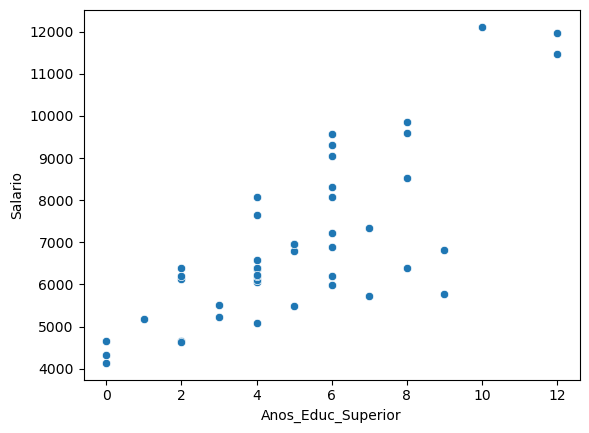

In [14]:
sns.scatterplot(x= df.Anos_Educ_Superior,
                y= df.Salario)

In [15]:
df.corr().round(2)

,Salario,Anos_Educ_Superior
Salario,1.00,0.78
Anos_Educ_Superior,0.78,1.00


Devido a correlação de pearson entre os dados Anos de Educação Superior e Salario possuir
uma correlação de 0.78, é possivel estabelecer uma relação positiva crescente
que nos permite dizer que caso a variavel Anos de Educação Superior aumente, o Salario tambem aumenta.

In [16]:
# Grafico HeatMap - Correlação Linear de Pearson

<Axes: >

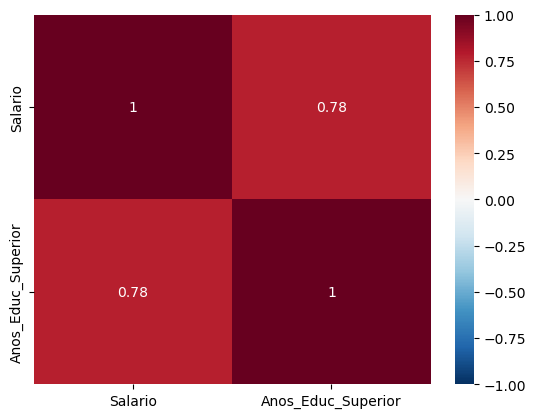

In [17]:
sns.heatmap(data= df.corr(),
            vmin= -1,
            vmax= 1,
            annot= True,
            cmap= "RdBu_r",
            )

# Ajuste do modelo de regressao usando a biblioteca do StatsModels

In [18]:
# Variavel Resposta
y = df.Salario

In [19]:
# Variavel explicativa
#x = df.Anos_Educ_Superior
##x = df[["Interceptor", "Anos_Educ_Superior"]]
#Intercepetor (Seria o 0,0 no cartesiano)

df["Interceptor"] = 1
x = df[["Interceptor", "Anos_Educ_Superior"]]

In [20]:
modelo = sm.OLS(y,x)
#apenas calcula a relação mas nao retorna o df
resultado = modelo.fit()

In [21]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     67.03
Date:                Sun, 27 Oct 2024   Prob (F-statistic):           2.18e-10
Time:                        19:51:00   Log-Likelihood:                -391.36
No. Observations:                  46   AIC:                             786.7
Df Residuals:                      44   BIC:                             790.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Interceptor         4301.7990    372

### Como avaliar
1. Avaliar o R-Squared
Ele é uma porcentagem em decimal que fala q explica o quanto a "reta" explica os casos no grafico
(59.5% dos casos é explicado pelo modelo da reta)

2. Avaliar o P > |t|
Quanto mais proximo de 0, melhor

3. Avaliar o coef
do interceptor representa o 0,0 do cartesiano, ou seja, nesse caso, 4301 é o valor de alguem q entra na empresa com 0 anos de experiencia
e a CADA ano de educ superior, adiciona 526,72
